In [1]:
%run func_def.ipynb

**imports loaded.

> Pre-Processing func:
    get_striking_efficiency(name, date)
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_c

In [2]:
loc = '../data/'
file = 'data_features.csv'
df = pd.read_csv(loc+file)

try:
    df = df.drop(['str_dif.1'], axis=1)
except:
    pass

df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6394, 23)


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.00651,0.146327,1.413746,1.115983,-0.006381
6392,lose,Jinh Yu Frey,Elise Reed,2023-06-03,Women's Strawweight,U-DEC,Unanimous,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,-0.00758,1.140573,-0.244404,0.002351,-0.006381
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,0.00000,-0.790410,0.003081,0.002351,-0.006381


In [3]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6.394000e+03
mean,-5.349541e-16,-2.128767e-17,-9.314250e-17,-3.769271e-16,-1.409809e-17,2.922279e-17,0.002002,-4.608276e-17,-2.011997e-17,-2.076676e-17,-3.037747e-17,-0.000151,9.079001e-13,-2.268160e-16,1.363307e-19,7.167712e-17
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.033383,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,0.028088,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-6.731833e+00,-1.148730e+01,-6.278428e+00,-8.611660e+00,-5.486567e+00,-3.444759e+00,-11.800000,-1.201433e+01,-5.717953e+00,-7.976739e+00,-6.268777e+00,-0.333330,-7.580900e+00,-2.471769e+00,-7.236255e+00,-6.126363e+00
25%,-2.525858e-03,-4.855861e-01,-3.839897e-01,-2.558225e-03,-5.751726e-01,-6.119089e-01,-0.500000,-6.432794e-01,-5.944012e-01,-5.701598e-01,-5.247937e-01,-0.004750,1.463269e-01,-5.166375e-01,-5.544646e-01,-6.380963e-03
50%,-2.525858e-03,-7.250817e-03,8.972871e-03,-2.558225e-03,2.308761e-03,9.936165e-03,0.000000,-3.540113e-03,-1.593565e-02,-2.364089e-03,-2.613352e-03,0.000000,1.463269e-01,3.080983e-03,2.351271e-03,-6.380963e-03
75%,-2.525858e-03,5.078795e-01,4.019354e-01,-2.558225e-03,5.797901e-01,5.972343e-01,0.400000,6.299273e-01,5.625299e-01,5.654316e-01,5.195670e-01,0.004330,1.463269e-01,4.980510e-01,5.591671e-01,-6.380963e-03
max,6.726781e+00,6.615853e+00,7.868224e+00,7.745633e+00,6.730247e+00,3.464631e+00,15.400000,5.917185e+00,6.843013e+00,1.276042e+01,5.480280e+00,0.500000,9.376671e+00,2.477931e+00,8.911405e+00,6.113601e+00


In [4]:
features = df.columns[7:]
len(features)
print(features)

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'str_efc_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif'],
      dtype='object')


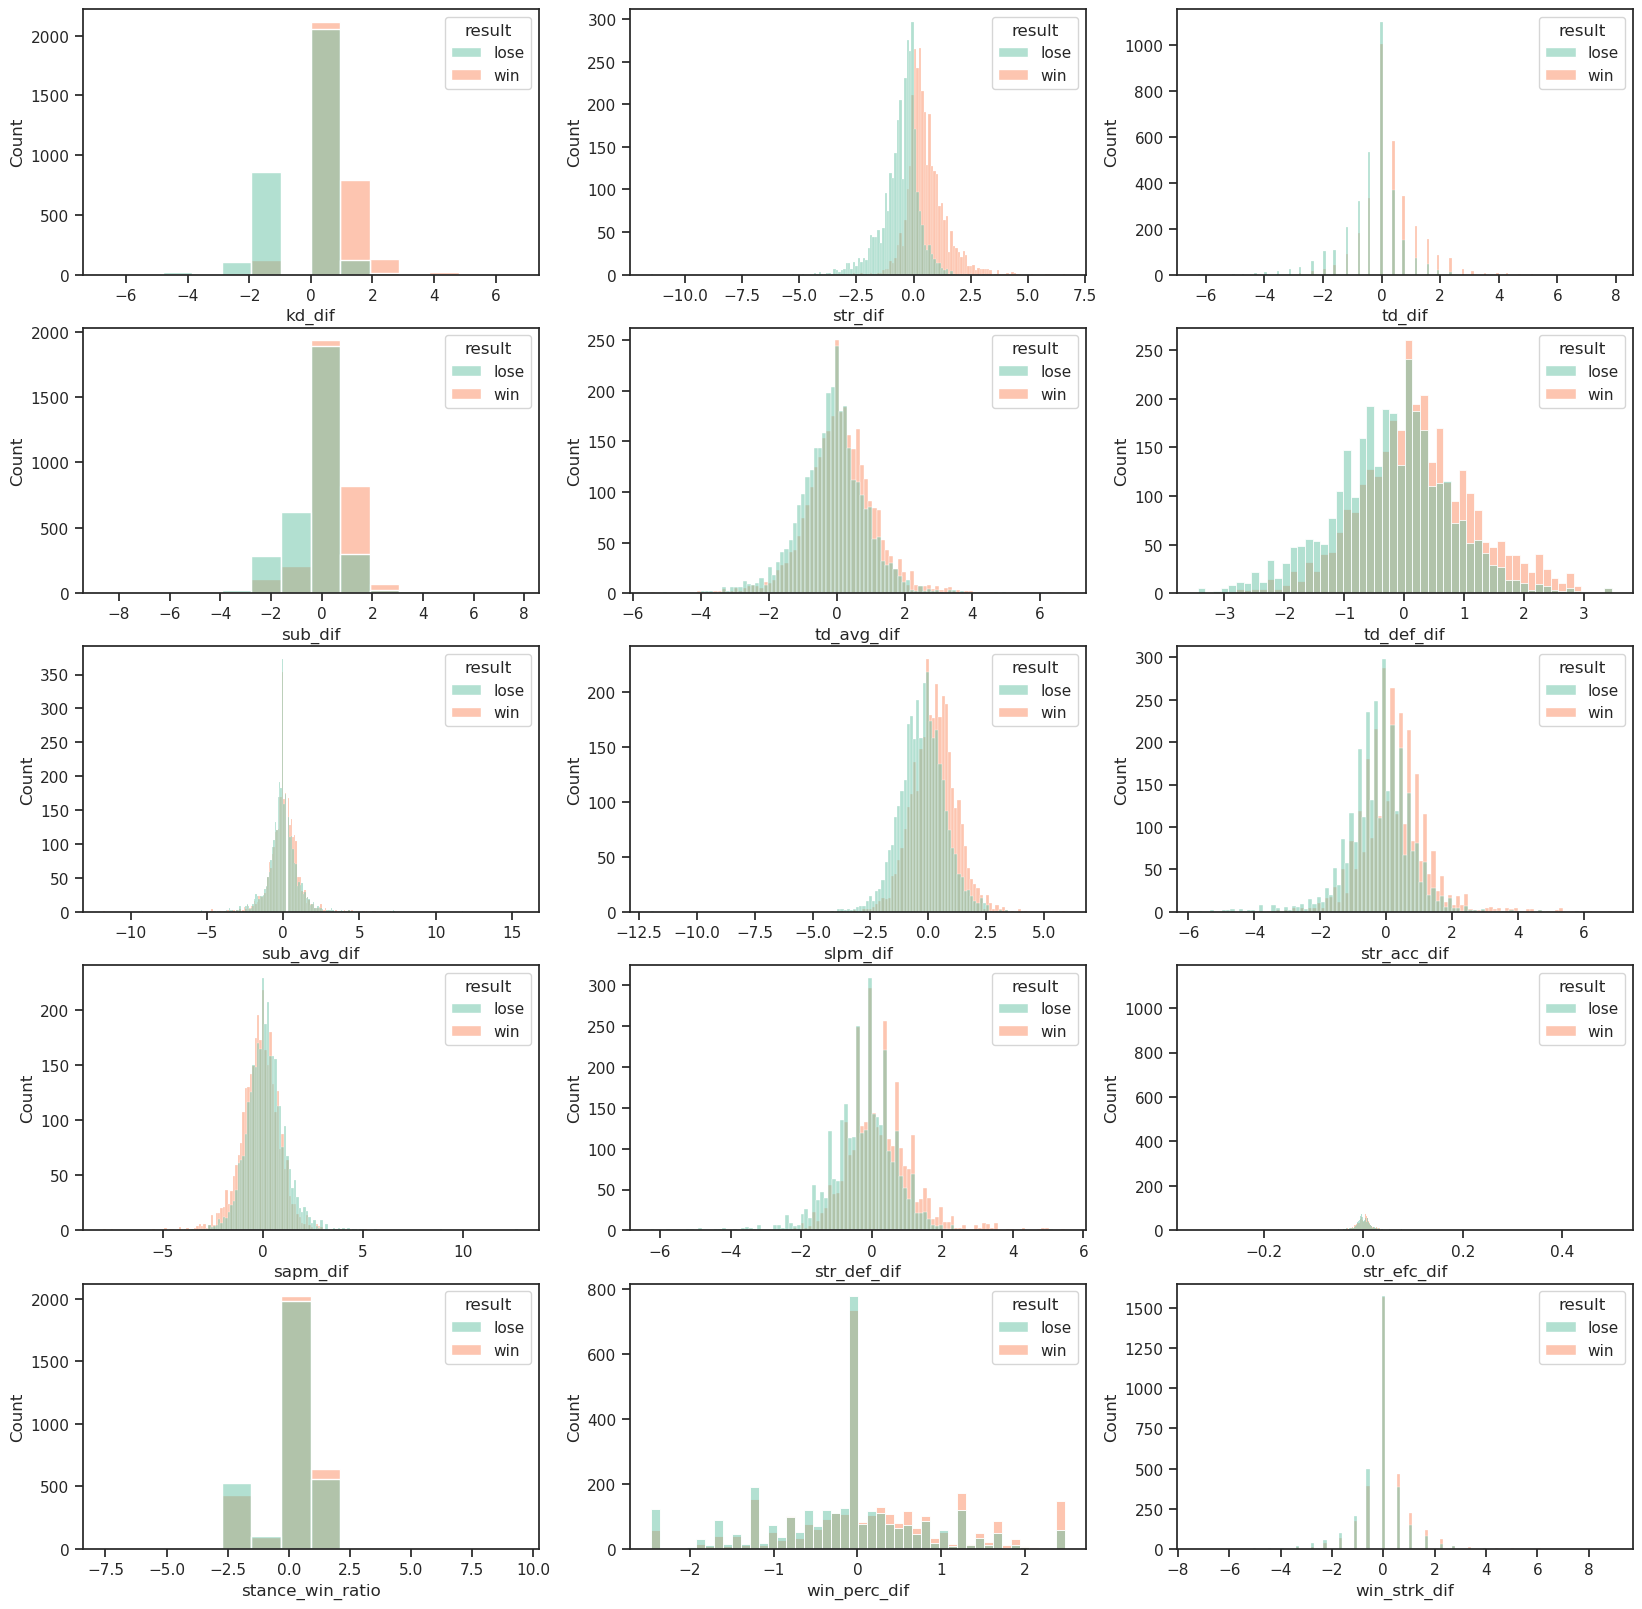

In [5]:
rows=5
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))

i = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(ax=axs[row,col], x=features[i], data=df, hue='result')
        i += 1

In [6]:
X = features # prediction model features
data = df.copy()
data['outlier'] = False

for feature in X:
    ucl = np.mean(df[feature]) + 3*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3*np.std(df[feature])
    
    inlier_list = df.index[(df[feature] > ucl)|(df[feature] < lcl)]
    data.loc[inlier_list,'outlier'] = True
    print('1d Outliers at %s: %s' %(feature,len(inlier_list)))

data.head(3)       

1d Outliers at kd_dif: 56
1d Outliers at str_dif: 90
1d Outliers at td_dif: 109
1d Outliers at sub_dif: 117
1d Outliers at td_avg_dif: 81
1d Outliers at td_def_dif: 24
1d Outliers at sub_avg_dif: 92
1d Outliers at slpm_dif: 45
1d Outliers at str_acc_dif: 108
1d Outliers at sapm_dif: 63
1d Outliers at str_def_dif: 116
1d Outliers at str_efc_dif: 100
1d Outliers at stance_win_ratio: 38
1d Outliers at win_perc_dif: 0
1d Outliers at win_strk_dif: 118
1d Outliers at lose_strk_dif: 192


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier
0,lose,Arnold Allen,Max Holloway,2023-04-15,Featherweight,U-DEC,Unanimous,-0.002526,-2.619697,0.008973,-0.002558,0.473264,-0.266439,0.0,-2.399427,-0.594401,-1.219970,0.171447,0.00454,1.140573,0.671291,5.570510,-1.026378,True
1,lose,Billy Quarantillo,Edson Barboza,2023-04-15,Featherweight,KO/TKO,Knee,-1.348387,-0.080841,0.008973,-0.002558,0.635856,-0.577362,1.1,2.417434,1.140995,1.051212,-1.569154,-0.00814,0.146327,0.300063,0.559167,-2.046375,False
2,win,Azamat Murzakanov,Dustin Jacoby,2023-04-15,Light Heavyweight,U-DEC,Unanimous,1.343336,0.103134,0.008973,-0.002558,0.198540,0.804516,0.0,-0.549200,0.810444,-0.576469,-0.089643,0.00399,1.140573,0.498051,0.559167,-1.026378,False


<AxesSubplot:xlabel='str_efc_dif', ylabel='str_dif'>

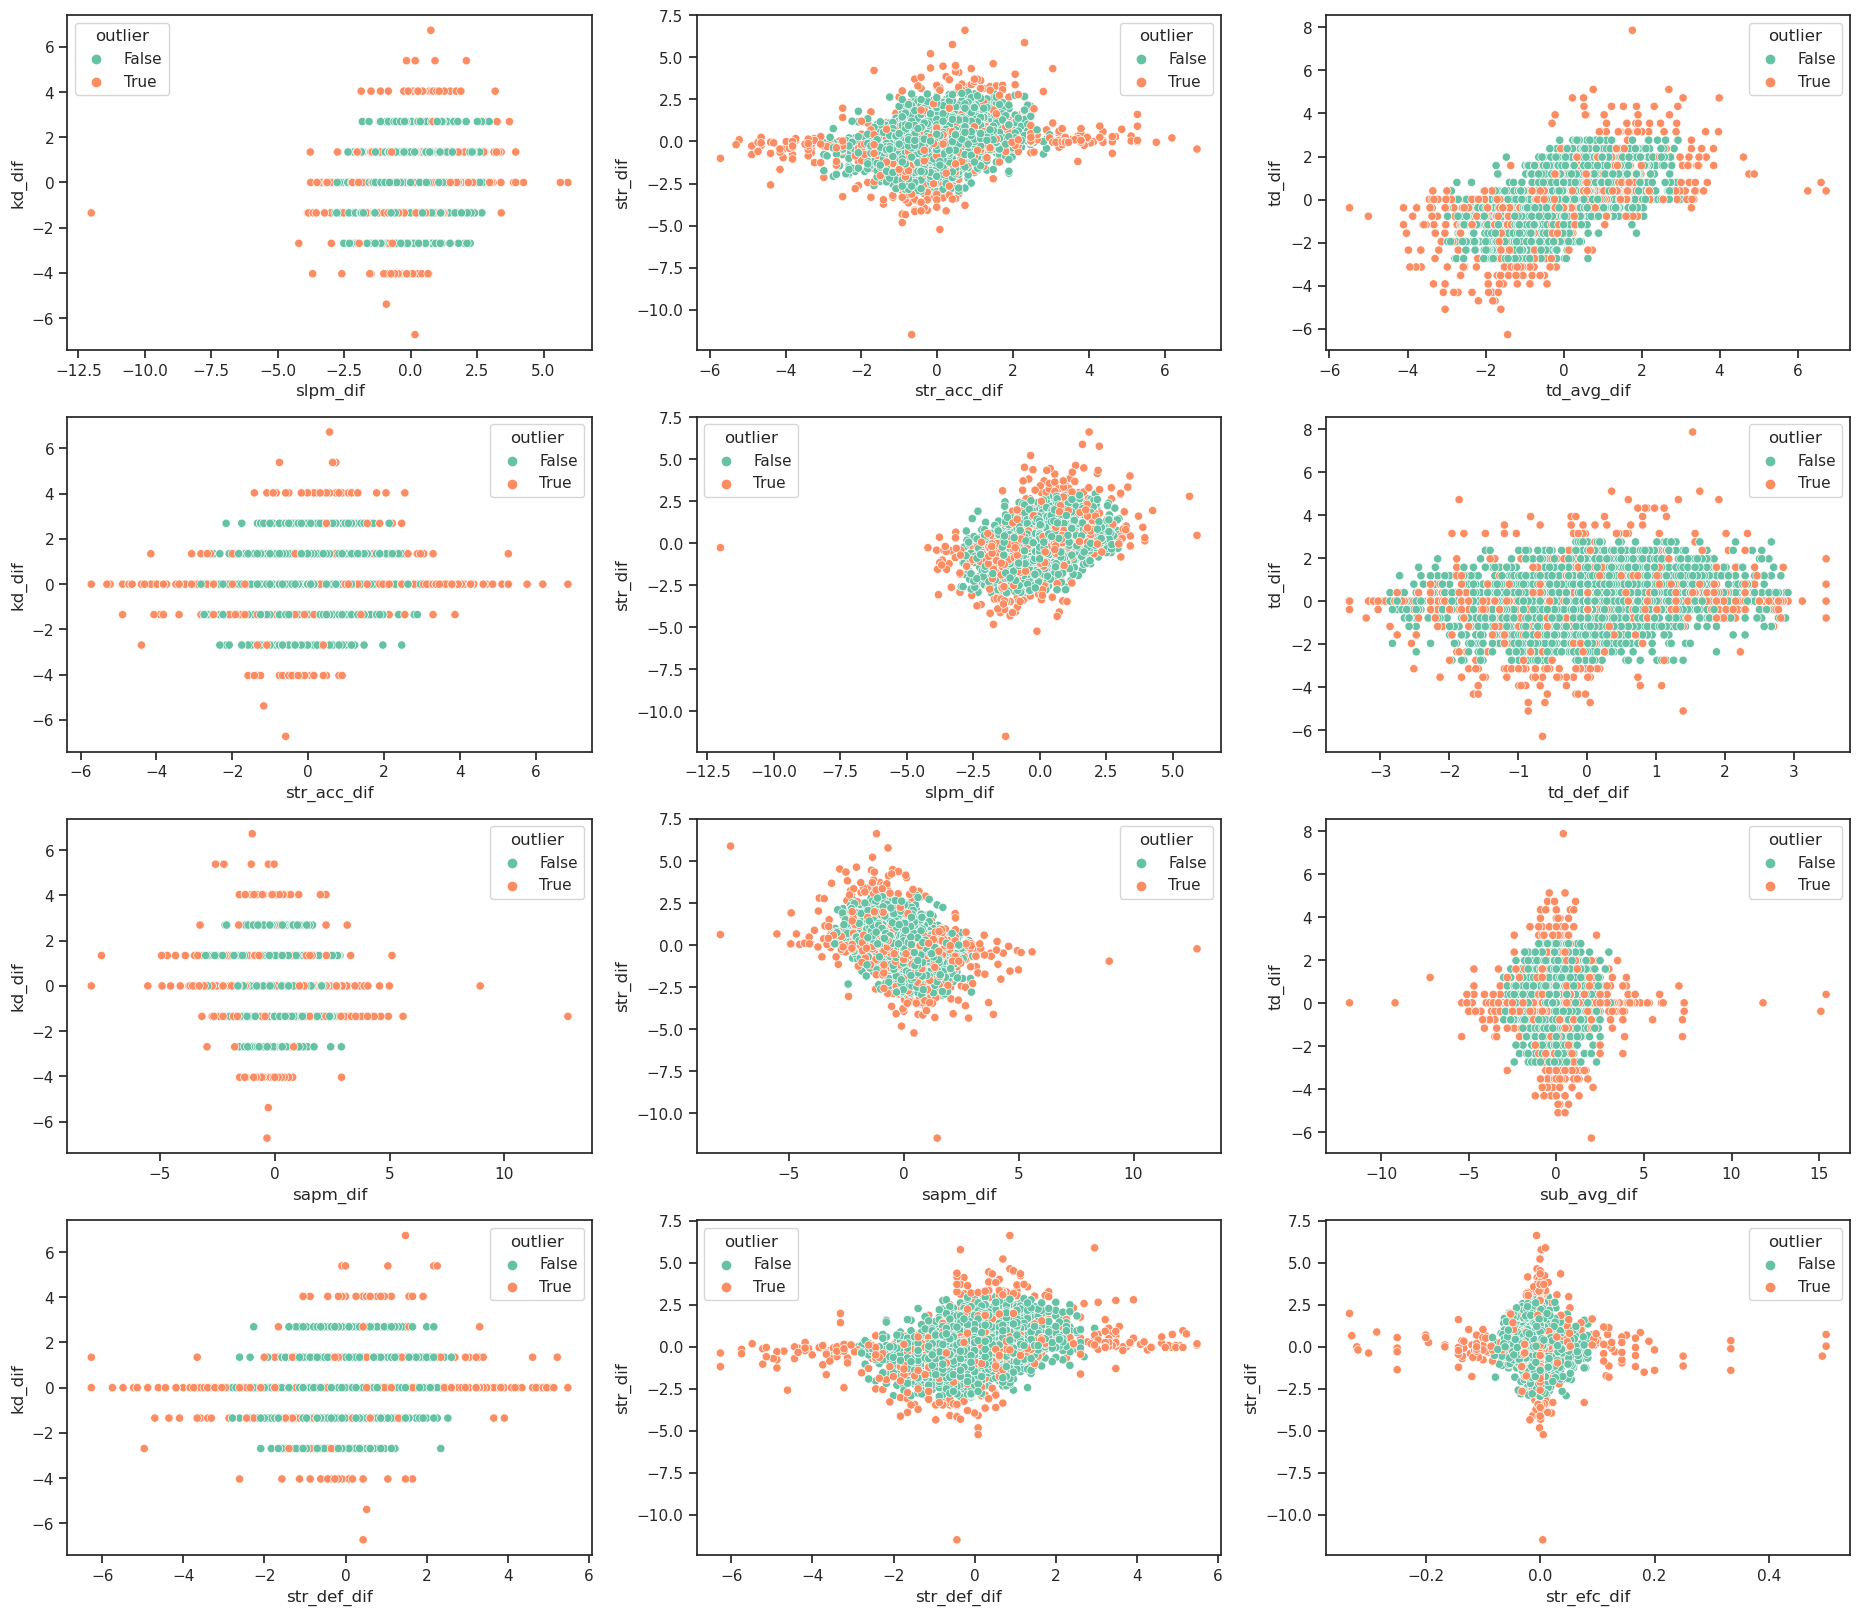

In [7]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,2], x='str_efc_dif', y='str_dif', data=data, hue='outlier')

## Train Local Outlier Factor model: 
LOF model detect outliers based on data points density, a point with lower density will be counted as an outlier

In [8]:
X

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'str_efc_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif'],
      dtype='object')

In [9]:
lof = set_outlier_detection_model(X_columns=X, data=data, n=20, contemination=0.05)
lof

LocalOutlierFactor(contamination=0.05, n_jobs=-1)

In [10]:
data['lof_inlier'] = lof.fit_predict(data[X])
lof_outliers = data.index[data.lof_inlier == -1]
data['lof_outlier'] = False
data.loc[lof_outliers, 'lof_outlier'] = True
data = data.drop(['lof_inlier'], axis=1)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.00651,0.146327,1.413746,1.115983,-0.006381,False,False
6392,lose,Jinh Yu Frey,Elise Reed,2023-06-03,Women's Strawweight,U-DEC,Unanimous,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,-0.00758,1.140573,-0.244404,0.002351,-0.006381,False,False
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,0.00000,-0.790410,0.003081,0.002351,-0.006381,False,False


<AxesSubplot:xlabel='str_efc_dif', ylabel='str_dif'>

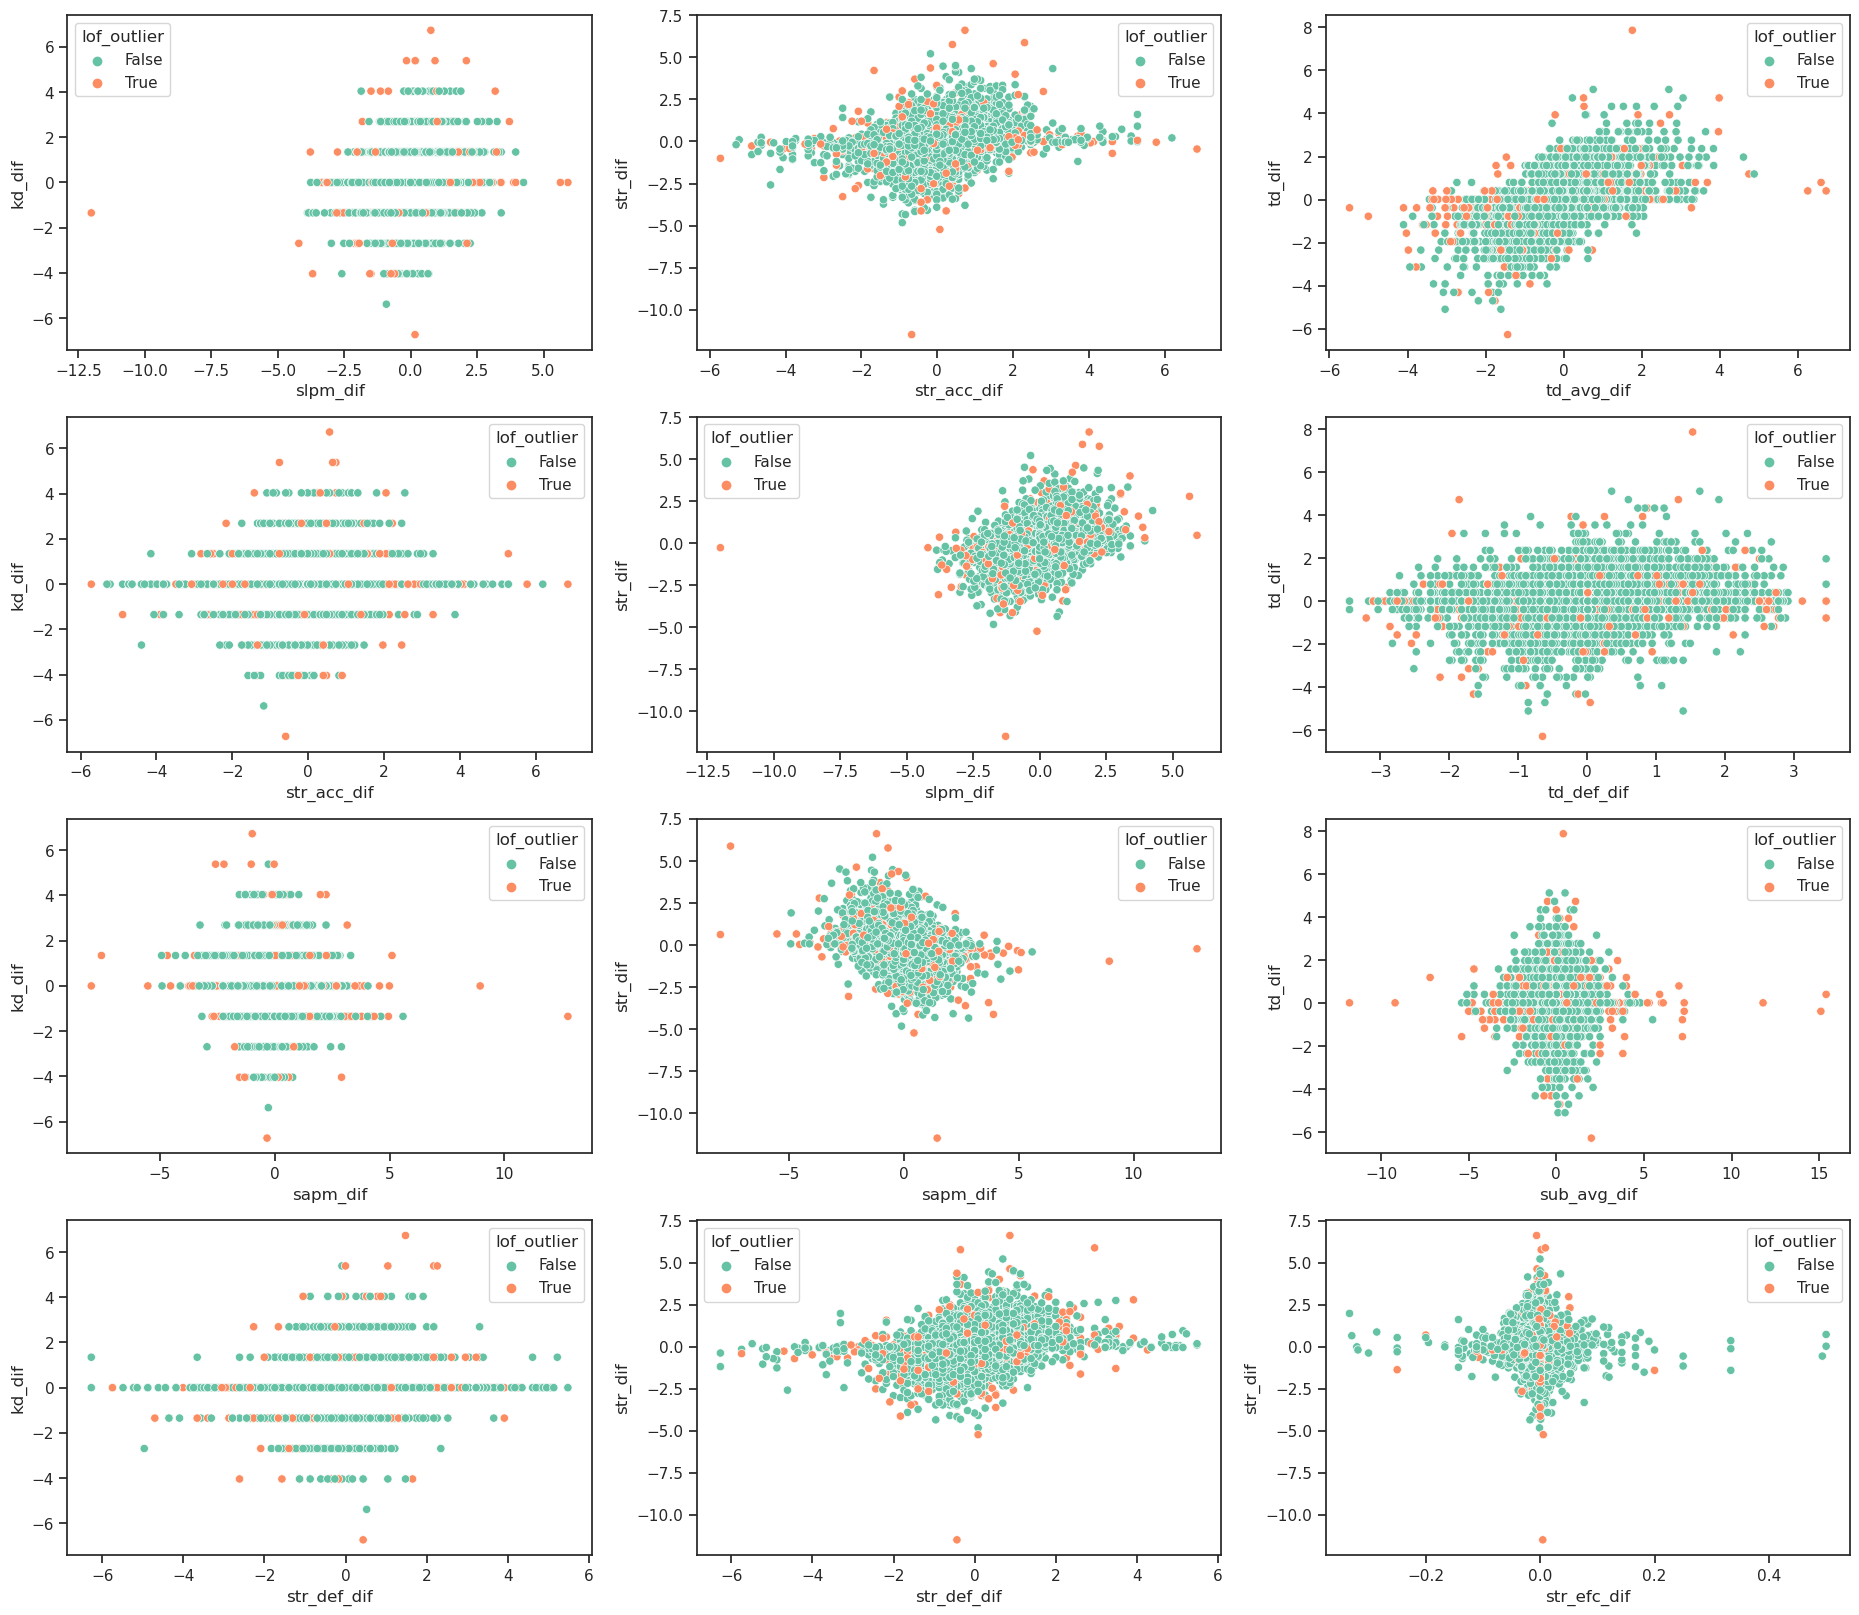

In [11]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,2], x='str_efc_dif', y='str_dif', data=data, hue='lof_outlier')

In [12]:
try:
    data.to_csv('../data/data_features_outliers_detected.csv', index=None)
    print('../data/data_features_outliers_detected.csv saved.')
except:
    print('error occurs saving ../data/data_features_outliers_detected.csv - might be file in use.')

../data/data_features_outliers_detected.csv saved.
